# Postfix To NFA

In [ ]:
import shunting_yard
from regex2NFA import State,NFA
from NFA2DFA import DFA
from minDFA import MinimizedDFA
from IPython.display import Image

# Visualization Function

In [ ]:
from graphviz import Digraph

def visualize_NFA(nfa):

  gra = Digraph(graph_attr={'rankdir':'LR'})


  for s in nfa.states:
      if(s.name == nfa.start.name):
        gra.node("", _attributes={'shape' : 'none'})
        gra.edge("", s.name)
      if(s.name == nfa.accepting.name):
        gra.node(s.name, _attributes={'peripheries' : '2'})
      else:
        gra.node(s.name)

  edge_set = set()
  for state in nfa.states:
    for edge in state.out_edges:

        destination = edge.dest
        edge_key = (state.name, destination.name, edge.label)
        if edge_key not in edge_set:
            edge_set.add(edge_key)
            gra.edge(state.name, destination.name, label=edge.label)

  gra.format = 'png'
  gra.render('NFA', view = True)
  return gra.source

In [ ]:
from graphviz import Digraph

def visualize_transition_dict(transition_dict,title):
    gra = Digraph(graph_attr={'rankdir': 'LR'})

    start_state = transition_dict["startingState"]
    gra.node("", _attributes={'shape': 'none'})
    gra.edge("", start_state)

    for state_name, transitions in transition_dict.items():
        if state_name == "startingState":
            continue

        is_terminating = transitions.get("isTerminatingState", False)

        if is_terminating:
            gra.node(state_name, _attributes={'peripheries': '2'})
        else:
            gra.node(state_name)

        for symbol, target_state in transitions.items():
            if symbol != "isTerminatingState":
                gra.edge(state_name, target_state, label=symbol)

    gra.format = 'png'
    gra.render(title, view=True)
    return gra.source

# NFA To DFA

In [262]:
#working

# postfix = shunting_yard.infix2postfix('Kam*(o|ou)la?')
# postfix = shunting_yard.infix2postfix('Aym[o+o+]na?')
# postfix = shunting_yard.infix2postfix('a+b*a')
# postfix = shunting_yard.infix2postfix('a+b')
# postfix = shunting_yard.infix2postfix('a*b*ca')
# postfix = shunting_yard.infix2postfix('a *b+ [a-z](c?)')
# postfix = shunting_yard.infix2postfix('(a+a+)+b')
# postfix = shunting_yard.infix2postfix('[a-c]*')
# postfix = shunting_yard.infix2postfix('[a-f0-9]32')
# postfix = shunting_yard.infix2postfix('[abc](d|e|f)')
# postfix = shunting_yard.infix2postfix('(a*b*)([a-b]*)')
# postfix = shunting_yard.infix2postfix('ab(b|c)*d+')
# postfix = shunting_yard.infix2postfix('a+b*')
# postfix = shunting_yard.infix2postfix('[bc]*(cd)+')
# postfix = shunting_yard.infix2postfix('[a-fA-C]')
# postfix = shunting_yard.infix2postfix('[A-Ea-c]+1|2[0-9]*K?[ABC](ABC)')
# postfix = shunting_yard.infix2postfix('(a|b)*a[ab]?')
# postfix = shunting_yard.infix2postfix('(a+?a+?)+?b')
# postfix = shunting_yard.infix2postfix('(a*b)(b?a+)')
# postfix = shunting_yard.infix2postfix('(a*?)*')
# postfix = shunting_yard.infix2postfix('(a*)*')
# postfix = shunting_yard.infix2postfix('employ(er|ee|ment|ing|able)')
# postfix = shunting_yard.infix2postfix('a+|b+')
# postfix = shunting_yard.infix2postfix('a*|b*')



nfa = NFA.postfix2NFA(postfix)
nfa.to_json()

dfa = DFA()
transitions,renamed_transitions=dfa.NFA2DFA(nfa)
dfa.to_json(transitions,renamed_transitions)

minimized_dfa = MinimizedDFA(dfa, renamed_transitions)
minimized_transitions = minimized_dfa.minimize()
minimized_dfa.to_json()


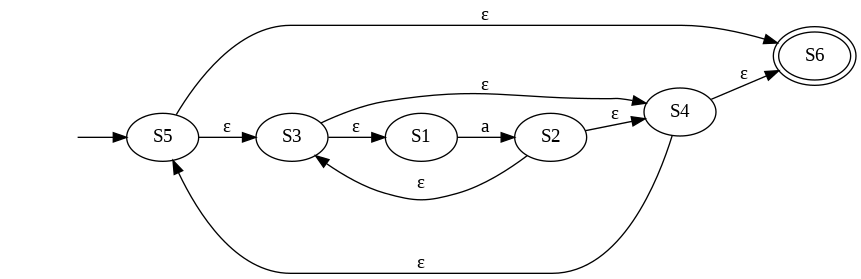

In [263]:
visualize_NFA(nfa)
Image(filename='NFA.png')

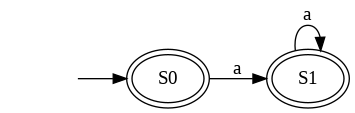

In [264]:
visualize_transition_dict(renamed_transitions,'DFA')
Image(filename='DFA.png')

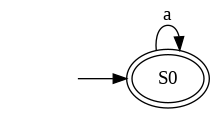

In [265]:
visualize_transition_dict(minimized_transitions,'minDFA')
Image(filename='minDFA.png')